# The Data Science Pipeline

In [1]:
import urllib2

url = 'http://ocw.mit.edu/courses/sloan-school-of-management/15-097-prediction-machine-learning-and-statistics-spring-2012/datasets/iris.csv'
response = urllib2.urlopen(url)

In [2]:
import pandas as pd
import numpy as np

iris = pd.read_csv(response, header=None)

In [3]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
import matplotlib.pyplot as pl
import seaborn as sns

In [7]:
%matplotlib inline

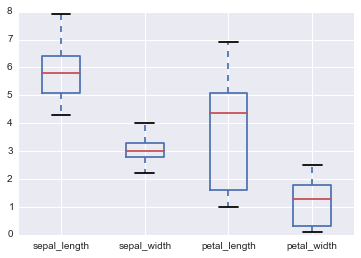

In [8]:
p = iris.boxplot(return_type='dict')

In [9]:
# generate quantiles 
iris.quantile([0.1, 0.9])

,sepal_length,sepal_width,petal_length,petal_width
0.1,4.8,2.50,1.4,0.2
0.9,6.9,3.61,5.8,2.2


In [10]:
iris.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# compuate a cooccurence matrix flaggin obeservations greather than mean
pd.crosstab(iris.petal_length > iris.petal_length.mean()
           ,iris.petal_width > iris.petal_width.mean())
# results show that the two features always occuor conjointly

petal_width,False,True
petal_length,,
False,56,1
True,4,89


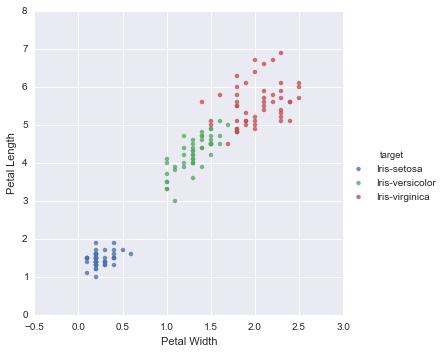

In [37]:
#pl.scatter(iris.petal_width, iris.petal_length, alpha=1.0,)
sns.lmplot('petal_width', 'petal_length', data=iris, fit_reg = False, hue ='target')
pl.xlabel("Petal Width")
pl.ylabel("Petal Length")

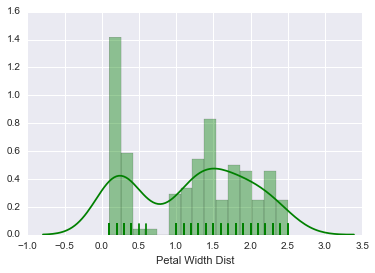

In [43]:
# check the distributions of the features
#pl.hist(iris.petal_width, bins = 15)
sns.distplot(iris.petal_width, rug = True , bins = 15, color = "green")
pl.xlabel("Petal Width Dist")

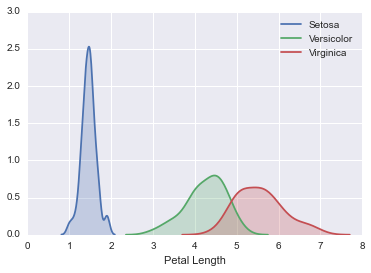

In [50]:
#pl.hist(iris.petal_length, bins = 15)
sns.kdeplot(iris[iris.target == "Iris-setosa"].petal_length, shade=True, label = "Setosa")
sns.kdeplot(iris[iris.target == "Iris-versicolor"].petal_length, shade=True, label = "Versicolor")
sns.kdeplot(iris[iris.target == "Iris-virginica"].petal_length, shade=True, label = "Virginica")
pl.xlabel("Petal Length")

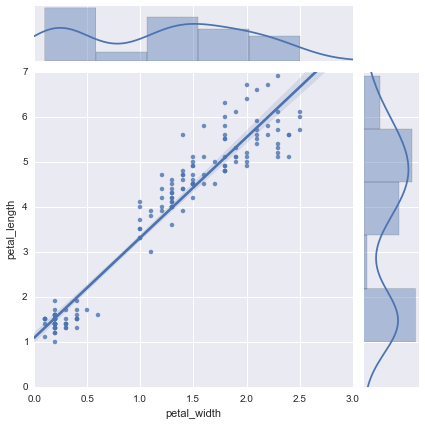

In [52]:
p = sns.JointGrid(x = "petal_width", y = "petal_length", data = iris, xlim=(0,3), ylim=(0,7))
p = p.plot(sns.regplot, sns.distplot)

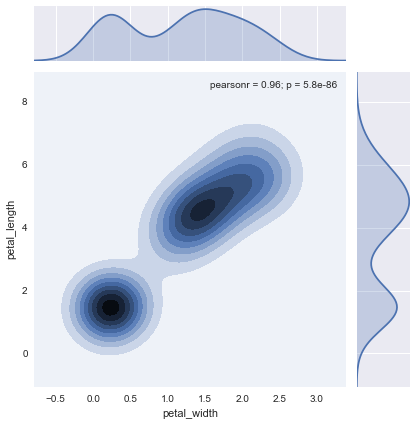

In [53]:
sns.jointplot("petal_width", "petal_length", data=iris, kind = "kde")

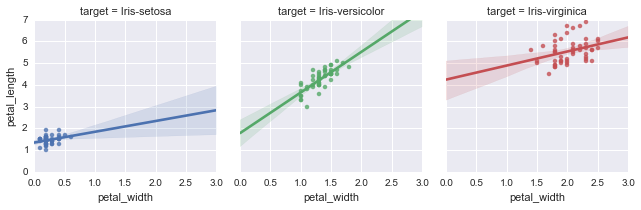

In [25]:
g = sns.FacetGrid(iris, col = 'target', hue ='target', xlim=(0,3), ylim=(0,7))
g.map(sns.regplot, "petal_width", "petal_length")

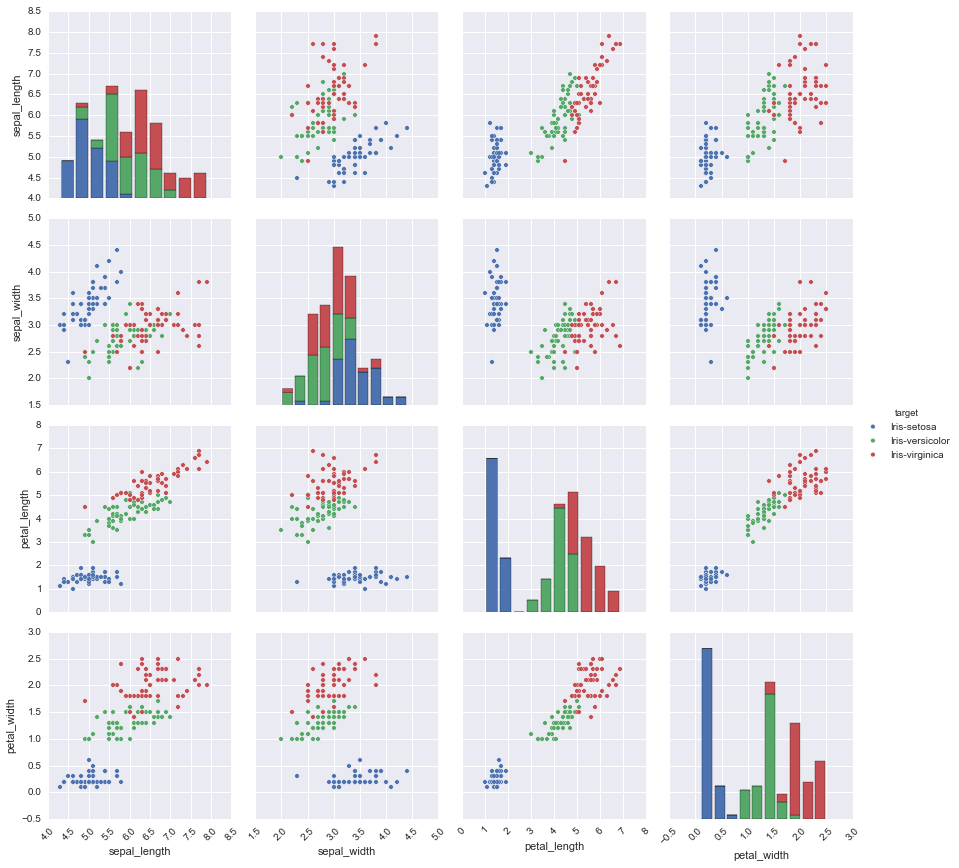

In [18]:
g = sns.pairplot(iris, hue = 'target', diag_kind='hist')

for ax in g.axes.flat:  
    pl.setp(ax.get_xticklabels(), rotation=45)

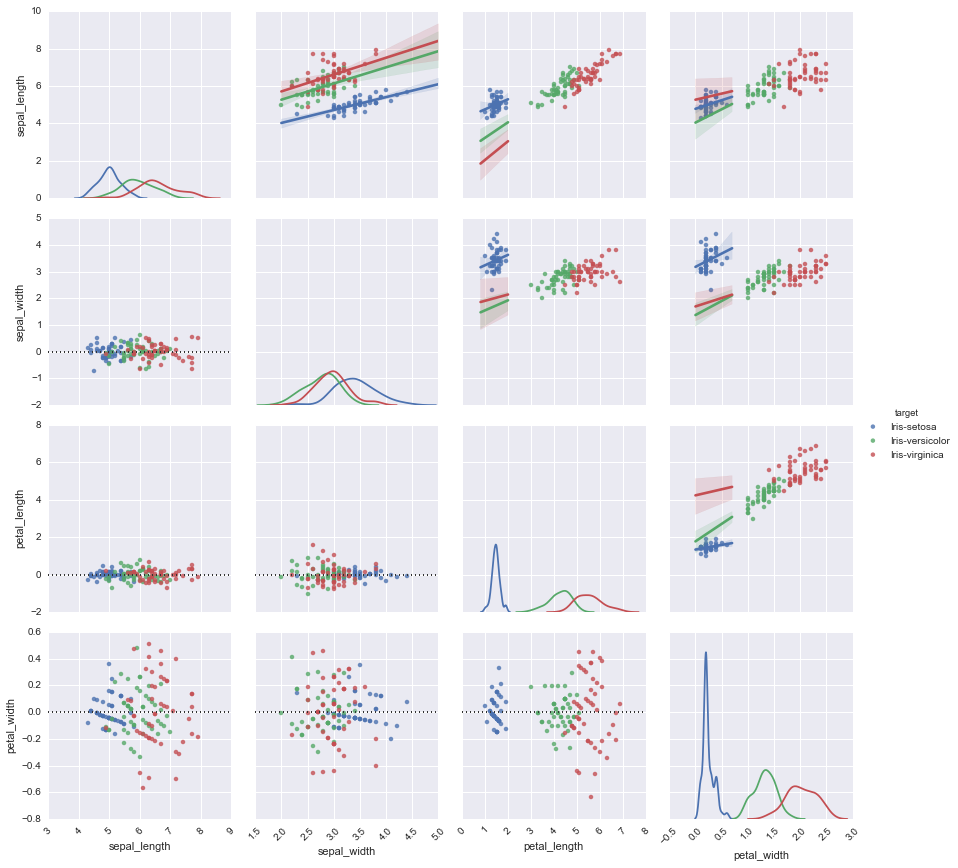

In [57]:
g = sns.PairGrid(iris, hue ='target')
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(sns.kdeplot)

for ax in g.axes.flat:  
    pl.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.5)  

## Feature Creation

In [44]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

cali = datasets.california_housing.fetch_california_housing()

X = cali['data']
y = cali['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 0.8)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)
y_est = regressor.predict(X_test)

print "MAE = ", mean_squared_error(y_test, y_est)

MAE =  1.11991973184


In [47]:
# normalize features using Zscores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

regressor = KNeighborsRegressor()
regressor.fit(X_train_scaled, y_train)
y_est = regressor.predict(X_test_scaled)

print "MAE = ", mean_squared_error(y_test, y_est)

MAE =  0.422695482651


In [48]:
# add a nonlinear feature to improve performance : square root of it
non_linear_feat = 5
X_train_new_feat = np.sqrt(X_train[:,non_linear_feat])
X_train_new_feat.shape = (X_train_new_feat.shape[0], 1)
X_train_extended = np.hstack([X_train, X_train_new_feat])

X_test_new_feat = np.sqrt(X_test[:, non_linear_feat])
X_test_new_feat.shape = (X_test_new_feat.shape[0], 1)
X_test_extened = np.hstack([X_test, X_test_new_feat])

scaler = StandardScaler()

X_train_extended_scaled = scaler.fit_transform(X_train_extended)
X_test_extened_scaled = scaler.fit_transform(X_test_extened)
regressor = KNeighborsRegressor()
regressor.fit(X_train_extended_scaled, y_train)
y_est  = regressor.predict(X_test_extened_scaled)

print "MAE = ", mean_squared_error(y_test, y_est)

MAE =  0.357831343525


## Dimensionality Reduction pg 90

In [65]:
# create covariance matrix
cov_mat = np.corrcoef(iris[['sepal_length', u'sepal_width', u'petal_length', u'petal_width']].T)

In [66]:
cov_mat

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

<matplotlib.colorbar.Colorbar instance at 0x000000001C705DC8>

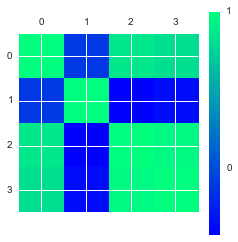

In [68]:
p = pl.matshow(cov_mat, cmap = pl.cm.winter)
pl.colorbar(p, ticks = [-1,0,1])

In [70]:
# PCA time
from sklearn.decomposition import PCA
from sklearn import datasets

iris = datasets.load_iris()

pca_2c = PCA(n_components = 2)
X_pca_2c = pca_2c.fit_transform(iris.data)
X_pca_2c.shape

(150L, 2L)

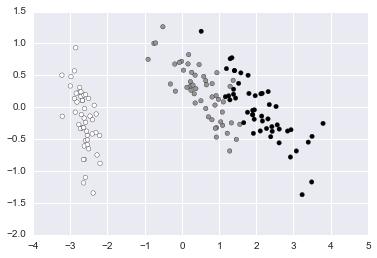

In [76]:
# plot pca
pl.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c= iris.target)

In [72]:
pca_2c.explained_variance_ratio_.sum()

0.97763177502480314

In [73]:
# view compnents
pca_2c.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

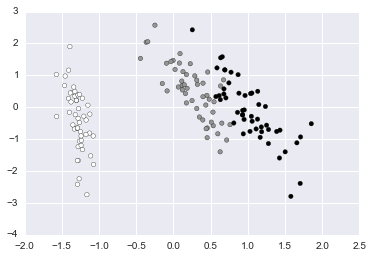

In [83]:
# whitening the scale by degraging the information quality of components ; removing any correlation between varitates
pca_2cw = PCA(n_components=0.95, whiten=True) # instead of 2 will say 95% of variance rep by n
X_pca_1cw = pca_2cw.fit_transform(iris.data)

pl.scatter(X_pca_1cw[:,0], X_pca_1cw[:,1], c=iris.target)

In [77]:
pca_2cw.explained_variance_ratio_.sum()

0.97763177502480314

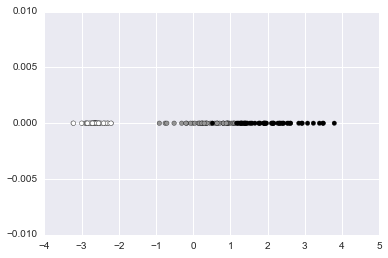

In [78]:
# project input into 1D space
pca_1c = PCA(n_components=1)
X_pca_1c = pca_1c.fit_transform(iris.data)

pl.scatter(X_pca_1c[:,0], np.zeros(X_pca_1c.shape), c=iris.target)

In [79]:
pca_1c.explained_variance_ratio_.sum()

0.92461620717426818

## Use Random Singular Value Compistion method (for big data)

In [80]:
from sklearn.decomposition import RandomizedPCA

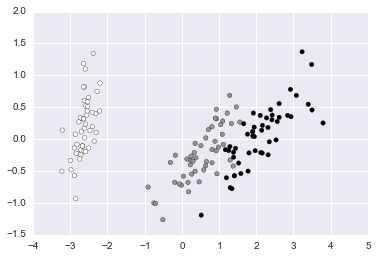

In [82]:
rpca_2c = RandomizedPCA(n_components=2) 
X_rpca_2c = rpca_2c.fit_transform(iris.data)

pl.scatter(X_rpca_2c[:,0], X_rpca_2c[:,1], c=iris.target)

## Factor Analysis

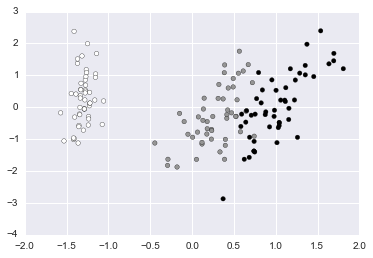

In [86]:
from sklearn.decomposition import FactorAnalysis

fact_2c = FactorAnalysis(n_components=2) # two factors
X_factor = fact_2c.fit_transform(iris.data)

pl.scatter(X_factor[:,0], X_factor[:,1], c=iris.target)

## LDA Linear Discrimanat Analysis

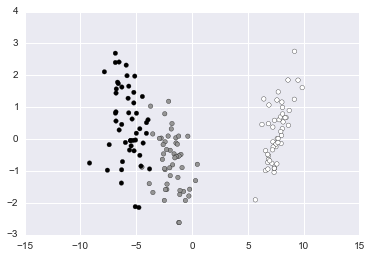

In [87]:
from sklearn.lda import LDA

lda_2c = LDA(n_components = 2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)

pl.scatter(X_lda_2c[:,0], X_lda_2c[:,1], c=iris.target)

## LSA Lateent Semantical Analysis

In [98]:
# use for text - topic modeling
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


sci_news = fetch_20newsgroups(categories= ['sci.med', 'sci.space'])

In [104]:
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(sci_news.data)

tsvd_2c = TruncatedSVD(n_components=50)
tsvd_2c.fit(word_freq)

np.array(tf_vect.get_feature_names())[tsvd_2c.components_[20].argsort
()[-10:][::-1]] 

array([u'jupiter', u'sq', u'comet', u'of', u'gehrels', u'gene', u'msb',
       u'omen', u'theporch', u'raider'], 
      dtype='<U79')

## ICA Independent Component Analysis

In [108]:
from sklearn.decomposition import FastICA

ica_10c = FastICA(n_components = 10)
ica_10c.fit(word_freq.toarray())

FastICA(algorithm='parallel', fun='logcosh', fun_args=None, max_iter=200,
    n_components=10, random_state=None, tol=0.0001, w_init=None,
    whiten=True)

In [115]:
ica_10c.mean_

array([  2.01901675e-03,   2.84445148e-03,   1.30261740e-04, ...,
         2.04707882e-04,   1.71696478e-04,   9.61895100e-05])

### Kernal PCA

In [125]:
def circular_points(radius, N):
    return np.array([[np.cos(2*np.pi*t/N)*radius, np.sin(2*np.pi*t/N)*radius] for t in xrange(N)])

In [126]:
fake = np.vstack([circular_points(1.0, 50)
                 ,circular_points(5.0, 50)])

fake += np.random.rand(*fake.shape)
fake = np.array([0]*50+ [1]*50)

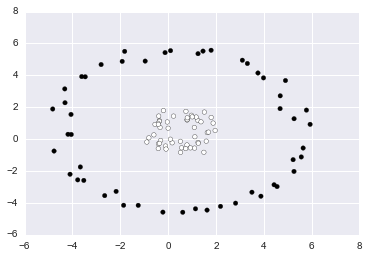

In [129]:
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points), 
circular_points(5.0, N_points)])

fake_circular_data += np.random.rand(*fake_circular_data.shape)
fake_circular_target = np.array([0]*N_points + [1]*N_points)

pl.scatter(fake_circular_data[:,0], fake_circular_data[:,1],  c=fake_circular_target)

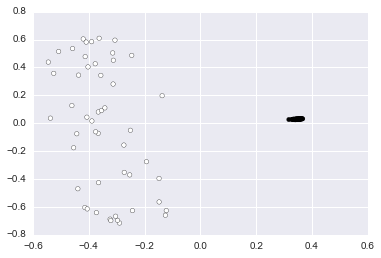

In [131]:
# this data will fail to seprate the two types but Kercnal PCA using RBF will be able to do it
from sklearn.decomposition import KernelPCA

kpca_2c = KernelPCA(n_components = 2, kernel = "rbf")
X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)

pl.scatter(X_kpca_2c[:,0], X_kpca_2c[:,1], c=fake_circular_target)

## RBM Restricted Boltzmann Machine

In [147]:
# create a nonlinear transform using hidden layers - probablistic 1,0 approach - so only for binaries
from sklearn.neural_network import BernoulliRBM

n_components = 64
olivetti_faces = datasets.fetch_olivetti_faces()

In [148]:
from sklearn import preprocessing

X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data), 0.5)

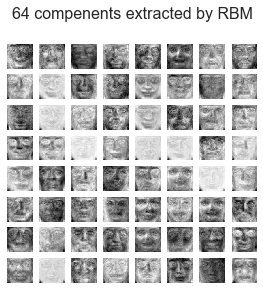

In [150]:
rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01, n_iter = 100)
rbm.fit(X)

pl.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    pl.subplot(int(np.sqrt(n_components+1)), int(np.sqrt(n_components+1)), i + 1)
    pl.imshow(comp.reshape((64, 64)), cmap=pl.cm.gray_r, interpolation='nearest')
    pl.xticks(()); pl.yticks(())
    pl.suptitle(str(n_components) + ' components extracted by RBM', fontsize=16)
    
pl.suptitle(str(n_components) + ' compenents extracted by RBM', fontsize=16)
pl.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

# Univariate Outlier Detection 102

In [3]:
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()
numerics = [n for n in range(np.shape(boston.data)[1]) if n!= 3]

In [4]:
from sklearn import preprocessing

scaled = preprocessing.StandardScaler().fit_transform(boston.data[:, numerics])

In [5]:
# anything above a z score of 3 is an outlier
outlier_rows, outlier_columns = np.where(np.abs(scaled) > 3)

In [6]:
print outlier_rows

[ 55  56  57 102 141 199 200 201 202 203 204 225 256 257 262 283 284 347
 351 352 353 353 354 355 364 365 367 373 374 374 380 398 404 405 406 410
 410 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429
 431 436 437 438 445 450 454 455 456 457 466]


In [7]:
# show tuple of row columns
print(list(zip(outlier_rows, outlier_columns)))

[(55, 1), (56, 1), (57, 1), (102, 10), (141, 11), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (225, 4), (256, 1), (257, 4), (262, 4), (283, 1), (284, 1), (347, 1), (351, 6), (352, 6), (353, 1), (353, 6), (354, 6), (355, 6), (364, 4), (365, 4), (367, 4), (373, 11), (374, 4), (374, 11), (380, 0), (398, 0), (404, 0), (405, 0), (406, 4), (410, 0), (410, 10), (411, 10), (412, 10), (412, 11), (414, 0), (414, 11), (415, 10), (416, 10), (418, 0), (418, 10), (419, 10), (423, 10), (424, 10), (425, 10), (426, 10), (427, 0), (427, 10), (429, 10), (431, 10), (436, 10), (437, 10), (438, 10), (445, 10), (450, 10), (454, 10), (455, 10), (456, 10), (457, 10), (466, 10)]


## Elliptic Envelope Algorithim to Detect Outliers - continous only

In [8]:
# create artifical distribution to demonstrate
from sklearn.datasets import make_blobs

blobs = 1
blob = make_blobs(n_samples=100, n_features=2, centers=blobs, cluster_std=1.5, shuffle=True, random_state=5)

In [9]:
# robust covariance estimate
from sklearn.covariance import EllipticEnvelope

robust_cov = EllipticEnvelope(contamination=.1).fit(blob[0])
detection = robust_cov.predict(blob[0])
outliers = np.where(detection==-1)
inliers = np.where(detection==1)

In [10]:
# draw distirbution and detected outliers
import matplotlib.pyplot as pl

In [11]:
%matplotlib inline

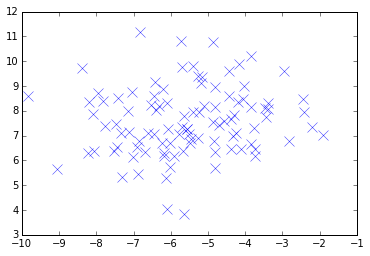

In [12]:
pl.plot(blob[0][:,0], blob[0][:,1], 'x', markersize=10, color='blue', alpha=0.8)

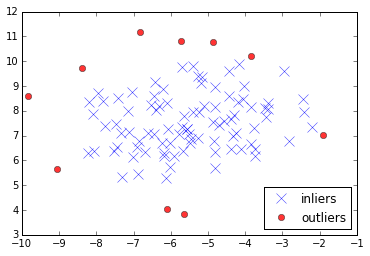

In [13]:
# districtuion and outliers
a = pl.plot(blob[0][inliers,0],blob[0][inliers,1], 'x',  markersize=10, color='blue', alpha=0.8, label='inliers')
b = pl.plot(blob[0][outliers,0],blob[0][outliers,1], 'o',  markersize=6,color='red', alpha=0.8, label='outliers')
pl.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='lower right')
#In the case of a unique underlying multivariate distribution (when the variable 
#blobs = 1), theEllipticEnvelope algorithm has successfullylocated 10 percent of 
#the observations on the fringe of the distribution itself and has consequently 
#signaled all the suspect outliers.

In [14]:
# apply on Boston Data
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Zscore_pca = pca.fit_transform(scaled)

In [15]:
vtot = 'PCA Variance explained ' +  str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

In [16]:
# Robust Covariance Estiamte
robust_est = EllipticEnvelope(store_precision=False, assume_centered=False, contamination=0.05)
robust_est.fit(scaled)
detection = robust_est.predict(scaled)

outliers = np.where(detection==-1)
inliers = np.where(detection==1)

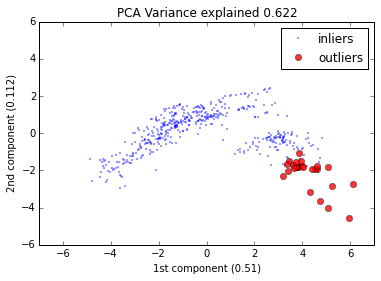

In [18]:
# draw distribution of detected outliers
a = pl.plot(Zscore_pca[inliers,0],Zscore_pca[inliers,1], 'x', markersize=2, color='blue', alpha=0.6, label='inliers')
b = pl.plot(Zscore_pca[outliers,0],Zscore_pca[outliers,1], 'o', markersize=6,color='red', alpha=0.8, label='outliers')
pl.xlabel('1st component ('+v1+')')
pl.ylabel('2nd component ('+v2+')')
pl.xlim([-7,7])
pl.ylim([-6,6])
pl.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
pl.title(vtot)

## OneClassSVM

In [19]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import svm

In [20]:
numerics = [n for n in range(np.shape(boston.data)[1]) if n!=3]

In [21]:
scaled = preprocessing.StandardScaler().fit_transform(boston.data[:, numerics])

In [22]:
# for vis purposes isolate first 5 PCA
pca = PCA(n_components=5)
Zscore_components = pca.fit_transform(scaled)
vtot = 'PCA Variance explained' + str(round(np.sum(pca.explained_variance_ratio_),3))

In [23]:
# oneclass SVM fitting and estimates
outliers_fraction = 0.02
nu_est = 0.95 * outliers_fraction + 0.05

ml = svm.OneClassSVM(kernel="rbf", gamma=1.0/len(scaled), degree=3, nu=nu_est)
ml.fit(scaled)
detection = ml.predict(scaled)

outliers = np.where(detection==-1)
regular = np.where(detection==1)

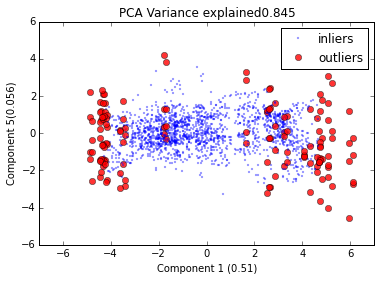

In [26]:
for r in range(1,5):
    a = pl.plot(Zscore_components[regular,0],Zscore_components[regular,r],  'x'
                , markersize=2, color='blue', alpha=0.6, label='inliers')
    b = pl.plot(Zscore_components[outliers,0],Zscore_components[outliers,r], 'o'
                , markersize=6,color='red', alpha=0.8, label='outliers')

    pl.xlabel('Component 1 ('+str(round(pca.explained_variance_ratio_[0],3))+')')
    pl.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
    pl.xlim([-7,7])
    pl.ylim([-6,6])
    pl.legend((a[0],b[0]),('inliers','outliers'),numpoints=1,loc='best')
    pl.title(vtot)

# Scoring Functions

## Multilabel Classification

In [27]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.50, random_state=4)

In [28]:
# use a bad multicallsifer
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [30]:
# examine the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print cm

[[30  0  0]
 [ 0 19  3]
 [ 0  2 21]]


In [34]:
# examine metrics
print "Accuracy : ", metrics.accuracy_score(y_test, y_pred)
print "Percision : ", metrics.precision_score(y_test, y_pred)
print "Recall :", metrics.recall_score(y_test, y_pred)
print "F1 score :", metrics.f1_score(y_test, y_pred) # harmonic avrage of recall and percsion

 Accuracy :  0.933333333333
Percision :  0.93373015873
Recall : 0.933333333333
F1 score : 0.933267359393


In [36]:
# look at support to check for blanace3 across classifiers
from sklearn.metrics import classification_report

print classification_report(y_test, y_pred, target_names = iris.target_names)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        30
 versicolor       0.90      0.86      0.88        22
  virginica       0.88      0.91      0.89        23

avg / total       0.93      0.93      0.93        75



## Testing and Validation  p118

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
print digits.DESCR

X = digits.data
y = digits.target

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [2]:
X[0][0:10]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.])

In [3]:
from sklearn import svm

h1 = svm.LinearSVC(C=1.0) # linear SVC
h2 = svm.SVC(kernel ='rbf', degree=3, gamma=0.001, C=1.0) # radial SVC
h3 = svm.SVC(kernel='poly', degree=3, C=1.0) # 3rd degress ploynomial

In [4]:
h1.fit(X,y)
print h1.score(X,y)

0.992209237618


In [5]:
from sklearn import cross_validation

In [6]:
chosen_random_state = 1

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y, test_size = 0.3, random_state = chosen_random_state)

In [7]:
print "X train shape %s , X test shape %s, \ny train shape %s, y test shape %s" % (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X train shape (1257L, 64L) , X test shape (540L, 64L), 
y train shape (1257L,), y test shape (540L,)


In [8]:
h1.fit(X_train, y_train)

print h1.score(X_test, y_test)

0.959259259259


In [9]:
# rerun the above with a validation split
X_train, X_validation_test, y_train, y_validation_test = cross_validation.train_test_split(X,y,test_size=0.4, random_state=chosen_random_state)

In [10]:
X_validation, X_test, y_validation, y_test = cross_validation.train_test_split(X_validation_test, y_validation_test, test_size=.5, random_state = chosen_random_state)

In [11]:
print "X train shape, %s, X validation shape %s, X test shape %s, \ny train shape %s, y validation shape %s, y test shape %s\n" % (X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape)

X train shape, (1078L, 64L), X validation shape (359L, 64L), X test shape (360L, 64L), 
y train shape (1078L,), y validation shape (359L,), y test shape (360L,)



In [12]:
for hypo in [h1,h2,h3]:
    hypo.fit(X_train, y_train)
    print ""
    print "%s -> validation mean accuarcy = %0.3f" % (hypo, hypo.score(X_validation, y_validation))


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0) -> validation mean accuarcy = 0.967

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False) -> validation mean accuarcy = 0.992

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) -> validation mean accuarcy = 0.989


In [13]:
# using cross validation instead
cv_folds = 3 # try 3, 5, or 20 # default 10
eval_scoring = 'f1' # also try f1 # defaul accuracy
workers = 4 # set to avialbe CPU

X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X,y, test_size=0.30, random_state=chosen_random_state)

In [ ]:
for hypo in [h1, h2, h3]:
    scores = cross_validation.cross_val_score(hypo, X_train, y_train, cv=cv_folds, scoring=eval_scoring, n_jobs=workers)
    print ""
    print "%s -> cross validation accuracy: mean = %0.3f std = %0.3f" % (hypo, np.mean(scores), np.std(scores))

In [ ]:
scores

In [ ]:
# examle using CV iterators with indexes
kfolding = cross_validation.KFold(n=100 # use 100 index
                                  , n_folds=10 # 10 folds
                                  , shuffle=True #randomly choose compnents
                                  , random_state=1) # set seed to reproduce

for train_idx, validation_idx in kfolding:
    print train_idx, validation_idx

In [ ]:
# use indexs to select which set
h1.fit(X[train_idx], y[train_idx])
h1.score(X[validtion_idx], y[validation_idx])

## Sampling and Bootstrapping

In [21]:
subsampling = cross_validation.ShuffleSplit(n=100, n_iter=10, test_size=0.1, random_state=1)

In [22]:
for train_idx, validation_idx in subsampling:
    print train_idx[0:10], validation_idx[0:10]

[92 39 56 52 51 32 31 44 78 10] [80 84 33 81 93 17 36 82 69 65]
[50  0 29 16 46 61 28 51 31  8] [44 96  1 35 26 11 38 82 87  3]
[97 63 91 70 43 11 46 94 21 89] [95 67 96 71  1 80 99 45 52 27]
[ 0  7 92 61 60 15 99 86 72 70] [40 10 96 66 89 32 95 55 25  5]
[20 65 53 86 44 59 47 77 31 95] [89 99 45 96 72  9 74 88  1 38]
[55 14 21 25 76 75 16 44 15 53] [ 0 86  4 23 24  1 62 83 66 93]
[29 46 81 69  9 92 23 93 56 37] [ 6 59 72 30 91 43 75 76 15 61]
[85 89 95 54 78 17 19 72 24 56] [44 88 74 48 59 79 25 52 45 55]
[ 6 87 78 16 92  2 61 56 88 54] [ 3 60 35 33 22 66 45 68 67 75]
[14 55 78  6 92 21 72 27 24 99] [64 91 12 52 16 65 50 68 33 30]


In [18]:
import random

def Bootstrap(n, n_iter=3, random_state=None):
    """
    Random sampling with replacement cross-validation generator.
    For each iter a sample bootstrap of the indexes [0, n) is 
    generated and the function returns the obtained sample 
    and a list of all the excluded indexes.
    """
    if random_state:
        random.seed(random_state)
    for j in range(n_iter):
        bs = [random.randint(0, n-1) for i in range(n)]
        out_bs = list({i for i in range(n)} - set(bs))
        yield bs, out_bs

In [20]:
boot = Bootstrap(n=100, n_iter=10, random_state=1)
for train_idx, validation_idx in boot:
    print train_idx[0:10], validation_idx[0:10]

[13, 84, 76, 25, 49, 44, 65, 78, 9, 2] [1, 5, 6, 7, 8, 10, 11, 14, 15, 16]
[5, 87, 56, 19, 50, 48, 35, 34, 53, 62] [4, 7, 9, 11, 12, 13, 21, 23, 26, 28]
[32, 87, 89, 1, 20, 32, 98, 78, 33, 21] [0, 2, 5, 12, 14, 15, 17, 18, 19, 28]
[30, 24, 8, 28, 98, 44, 65, 64, 94, 39] [1, 4, 5, 9, 11, 16, 18, 19, 20, 21]
[90, 91, 27, 64, 4, 7, 51, 87, 15, 76] [1, 3, 6, 8, 9, 14, 19, 22, 23, 30]
[50, 35, 52, 0, 44, 44, 30, 39, 78, 68] [2, 3, 5, 6, 8, 9, 10, 11, 12, 13]
[70, 84, 3, 89, 62, 31, 43, 76, 78, 18] [0, 7, 8, 17, 19, 20, 22, 25, 28, 29]
[6, 93, 59, 34, 60, 56, 52, 6, 35, 41] [0, 1, 7, 11, 16, 17, 18, 20, 21, 22]
[13, 52, 57, 99, 78, 70, 74, 36, 94, 64] [1, 3, 6, 8, 11, 15, 19, 21, 22, 23]
[89, 92, 84, 38, 46, 79, 37, 74, 48, 33] [3, 4, 5, 6, 7, 13, 14, 15, 16, 18]


In [24]:
h1 = svm.SVC()
hp = svm.SVC(probability=True, random_state=1)

In [4]:
# Grid search CV will automatically search fro the best parameters
from sklearn import grid_search

search_grid = [
    {'C' : [1,10,100,1000], 'kernel': ['linear']},
    {'C' : [1,10,100,1000], 'gamma' : [0.001, 0.0001], 'kernel' : ['rbf']},
    ]

scorer = 'accuracy'

In [30]:
# grid search start
search_func = grid_search.GridSearchCV(estimator=h1
                                       , param_grid=search_grid
                                       , scoring=scorer
                                       , n_jobs=-1
                                       , iid=False # all classes considered the same
                                       , refit=True  # will fit with predictions
                                       , cv=10)

In [ ]:
%timeit search_func.fit(X,y)

print search_func.best_estimator_
print search_func.best_params_
print search_fun.best_score_

In [1]:
# build custom socring function using the log-loss instead ; always make right answer ranked highest in prob
from sklearn.metrics import log_loss, make_scorer

Log_Loss = make_scorer(log_loss, greater_is_better=False, needs_proba = True)

In [7]:
# setup data and SVM again
from sklearn.datasets import load_digits
from sklearn import svm

digits = load_digits()
X,y = digits.data, digits.target

h = svm.SVC()
hp = svm.SVC(probability=True, random_state=1)

In [13]:
search_func = grid_search.GridSearchCV(estimator=hp
                                      ,param_grid = search_grid
                                      ,scoring=Log_Loss
                                      ,iid=False
                                      ,refit = True
                                      ,cv = 3)

In [18]:
%timeit search_func.fit(X,y)

1 loops, best of 3: 10.1 s per loop


In [17]:
print search_func.best_score_
print search_func.best_params_

-0.16138394082
{'kernel': 'rbf', 'C': 1, 'gamma': 0.001}


In [19]:
# minimze mistakes on numbers 1 and 7
import numpy as np
from sklearn.preprocessing import LabelBinarizer

def my_custom_log_loss_func(ground_truth, p_predictions, penalty = list(), eps =1e-15):
    adj_p = np.clip(p_predictions, eps, 1 - eps)
    lb = LabelBinarizer()
    g = lb.fit_transform(ground_truth)
    if g.shape[1] == 1:
        g = np.append(1 - g, g , axis=1)
    if penalty :
        g[:, penalty] = g[:,penalty] * 2
    summation = np.sum(g * np.log(adj_p))
    return summation * (-1.0/len(ground_truth))

In [20]:
# put penalty on confusing numbers 4 and 9
my_custom_scorer = make_scorer(my_custom_log_loss_func, greater_is_better=False, needs_proba=True, penalty=[4,9])

In [21]:
# doubles effective log loss for 4 and 9 
search_func = grid_search.GridSearchCV(estimator=hp
                                      ,param_grid = search_grid
                                      ,scoring=my_custom_scorer
                                      ,iid=False
                                      ,refit = True
                                      ,cv = 3)

In [22]:
search_func.fit(X,y)

GridSearchCV(cv=3,
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_log_loss_func, greater_is_better=False, needs_proba=True, penalty=[4, 9]),
       verbose=0)

In [23]:
print search_func.best_score_
print search_func.best_params_

-0.199610271298
{'kernel': 'rbf', 'C': 1, 'gamma': 0.001}


In [26]:
# when data is sparse or big : gread search can draw random samples of combinations
search_dict = {"kernel":['linear', 'rbf'], 'C': [1,10,100,1000], 'gamma' : [0.001, 0.0001]}

In [28]:
search_func = grid_search.RandomizedSearchCV(estimator=h, param_distributions=search_dict, n_iter=7, scoring=scorer, iid=False, refit=True, cv = 10)

In [29]:
%timeit search_func.fit(X,y)

1 loops, best of 3: 4.8 s per loop


In [30]:
print search_func.best_estimator_
print search_func.best_score_
print search_func.best_params_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)
0.981081122784
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


In [31]:
# Test only 7 out of 14, The 7 chosen were
search_func.grid_scores_

[mean: 0.98108, std: 0.01551, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001},
 mean: 0.95488, std: 0.02770, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001},
 mean: 0.98108, std: 0.01551, params: {'kernel': 'rbf', 'C': 10, 'gamma': 0.001},
 mean: 0.98108, std: 0.01551, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001},
 mean: 0.97164, std: 0.02044, params: {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001},
 mean: 0.96108, std: 0.02191, params: {'kernel': 'linear', 'C': 10, 'gamma': 0.001},
 mean: 0.97889, std: 0.01788, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}]

# Feature Selection

## Univariate Selection

In [32]:
from sklearn.datasets import make_classification

# makes 800 cases and 100 features data set ; only 25 important variables
X,y = make_classification(n_samples=800, n_features=100, n_informative=25, n_redundant=0, random_state=101)

In [34]:
from sklearn.feature_selection import SelectPercentile, chi2, f_classif
from sklearn.preprocessing import Binarizer, scale

In [35]:
Xbin = Binarizer().fit_transform(scale(X))

In [36]:
selector_chi2 = SelectPercentile(chi2, percentile=25).fit(Xbin, y)
selector_f = SelectPercentile(f_classif, percentile=25).fit(X,y)

chi_scores = selector_chi2.get_support()
f_scores = selector_f.get_support()

selected = chi_scores & f_scores

In [40]:
print "These were indcaited asa both being predictive by the tests"
print "Total number is of vars is:", sum(selected)

These were indcaited asa both being predictive by the tests
Total number is of vars is: 21


## Recursive Elimination

In [41]:
from sklearn.cross_validation import train_test_split

X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.30, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)

print 'In-sample accuracy: %0.3f' % classifier.score(X_train, y_train)
print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test)

In-sample accuracy: 1.000
Out-of-sample accuracy: 0.667


In [45]:
# the number of feasures leads to a high training accuracy and thus feature elimination is desireable
from sklearn.feature_selection import RFECV

selector = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 4


In [46]:
# only 4 out of 100 are deemed viable
# prune results with the 4
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)

print "Out of sample accuracy  : %0.3f" % classifier.score(X_test_s, y_test)

Out of sample accuracy  : 0.900


## Stability and L1-based Selection

In [47]:
from sklearn.svm import LinearSVC

classifier = LogisticRegression(C=0.1, penalty='l1', random_state=101) # the smaller C the fewer features selected
classifier.fit(X_train, y_train)

print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test)

Out-of-sample accuracy: 0.933


In [48]:
# stabilization selects variables that fail to shrink to 0 vis L1 penalty
from sklearn.linear_model import RandomizedLogisticRegression

selector = RandomizedLogisticRegression(n_resampling=300, random_state=101)
selector.fit(X_train, y_train)

print 'Variables selected: %i' % sum(selector.get_support()!=0)

Variables selected: 3


In [49]:
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)

print 'Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test)

Out-of-sample accuracy: 0.933
